<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Z-tests (Part 2)
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 13</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Three classes of Z-tests:

- **Right-tailed**
- Left-tailed
- Double-sided

We did this in previous lecture. 

- Believe that our sample derived from a population with unknown mean **greater** than null population mean:

$$ \mu_1  >  \mu_0 $$



Significance level at $\alpha = 0.05$:
- 0.95 fraction of sampled means under the null hypothesis would lie below this point.
- Only 0.05 fraction of sample means under the null hypothesis lie **greater** than this point.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import poisson

In [2]:
%%capture right_tail_alpha


x_scaled = np.linspace(-5,5,200)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[0].axvline(1.645, c = 'b')
ax[0].fill_between(x_scaled, Y_scaled, where = (x_scaled > 1.645 ), alpha = 0.5, color='b')
ax[0].annotate(r'$\alpha$ = 0.05', xytext = (2.5,.1), xy = (2.2,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
ax[0].set_xlabel('Z')
ax[0].set_ylabel('PDF')
ax[0].set_title('Right-Tailed Test')

ax[1].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[1].axvline(1.645, c = 'b')
ax[1].fill_between(x_scaled, Y_scaled, where = (x_scaled < 1.645 ), alpha = 0.5, color='r')
ax[1].annotate('c = 0.95', xytext = (-5.0,.25), xy = (-.5,.20), fontsize=16, arrowprops=dict(facecolor='r', shrink=0.05), c ='r' )
ax[1].set_xlabel('Z')
ax[1].set_ylabel('PDF')
ax[1].set_title('Right-Tailed Test')
plt.show()

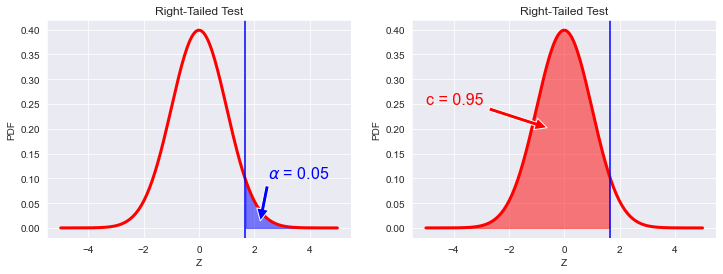

In [3]:
right_tail_alpha()

**Corresponds** to $Z_{crit} = 1.645$

Recall our population:
- for site A

**Use for null**

In [4]:
population_with_site_A = poisson.rvs(
    mu = 2, size = 500000)

In [5]:
mu_0 = population_with_site_A.mean()
mu_0

2.001168

In [6]:
sigma_0 = population_with_site_A.std()
sigma_0

1.4151546331676974

Soundcloud UX/UI rolls out variant website B.

- Observe a sample mean of visits per day per user of 2.25.
- Sample size N = 200.

**Construct z-statistic for our sample**

Use population mean and std:

In [7]:
#  Calculate Z-statistic
Xbar = 2.25
N = 200
Z = (Xbar - mu_0)/((sigma_0)/np.sqrt(N))
Z

2.4866652795724655

#### Scipy:

- to calculate p-value for right-tailed test

In [8]:
p_rightsided = norm.sf(Z)
p_rightsided

0.006447332855046884

**Reject the null**

#### Three classes of Z-tests:
- **Left-tailed**
- Right-tailed
- Double-sided

Management also wants to try a new layout for a website (Site C) without consulting the Quality Analysis (QA) Team.

We believe that the new web site sucks.

So far, we have a finite sample of daily site visits per user per day with site C.


*What might our hypothesis be?*

- **Hypothesis**: mean of this finite sample $\bar{X_1}$ comes from a population whose (unknown) mean $\mu_1$:

- Less than population mean $\mu_0$. 

$$ \mu_1 < \mu_0 $$

Test $\bar{X_1}$ against distribution of mean of samples drawn from the population (site A data):

Set significance level $\alpha$ = 0.05:

- threshold: probability of value or **less** <= 0.05 of getting $\bar{X_1}$ or less under the null.

Equivalently: 
- \>= 0.95 of $\bar{X}$ of samples drawn from original population are greater than $\bar{X}_1$.


#### Left-Tailed Test

In [9]:
%%capture left_tail_alpha
x_scaled = np.linspace(-5,5,200)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[0].axvline(-1.645, c = 'b')
ax[0].fill_between(x_scaled, Y_scaled, where = (x_scaled < -1.645 ), alpha = 0.5, color='b')
ax[0].annotate(r'$\alpha$ = 0.05', xytext = (-5,.1), xy = (-2.2,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
ax[0].set_xlabel('Z')
ax[0].set_ylabel('PDF')
ax[0].set_title('Left-Tailed Test')

ax[1].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[1].axvline(-1.645, c = 'b')
ax[1].fill_between(x_scaled, Y_scaled, where = (x_scaled > -1.645 ), alpha = 0.5, color='r')
ax[1].annotate('c = 0.95', xytext = (2.0,.25), xy = (.5,.20), fontsize=16, arrowprops=dict(facecolor='r', shrink=0.05), c ='r' )
ax[1].set_xlabel('Z')
ax[1].set_ylabel('PDF')
ax[1].set_title('Left-Tailed Test')
plt.show()

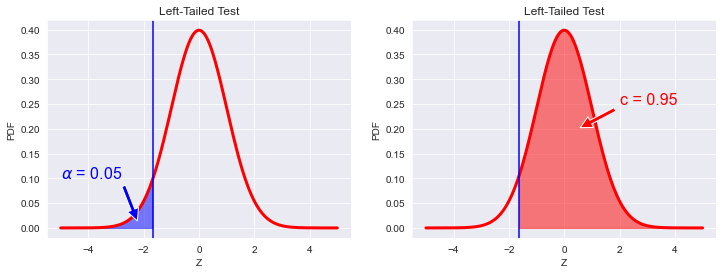

In [10]:
left_tail_alpha()

**Corresponds** to $Z_{crit} = -1.645$
- Note that  $Z_{crit}$ in a left-tailed test is negative!

Sample of user engagement with site C:
- N = 200 samples

In [11]:
N = 200
sample_with_site_C = poisson.rvs(mu = 1.65, size = N )

In [12]:
sample_with_site_C

array([1, 1, 1, 2, 3, 4, 1, 0, 1, 2, 3, 1, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1,
       2, 1, 0, 3, 0, 4, 3, 2, 1, 2, 1, 2, 2, 2, 3, 0, 0, 2, 2, 3, 3, 1,
       0, 0, 0, 3, 3, 1, 1, 4, 1, 4, 2, 4, 2, 3, 2, 2, 5, 2, 3, 1, 2, 0,
       0, 3, 3, 0, 3, 2, 2, 3, 2, 1, 1, 1, 1, 0, 0, 2, 3, 0, 1, 3, 1, 1,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 3, 0, 5, 0, 1, 1, 0, 3, 0, 0,
       0, 1, 1, 1, 0, 3, 2, 4, 1, 4, 1, 4, 1, 3, 1, 1, 0, 3, 1, 1, 3, 1,
       4, 4, 2, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 1, 1, 0, 1, 2, 2, 3, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 0, 3, 1, 3, 3, 2,
       1, 3, 1, 1, 1, 2, 0, 2, 3, 1, 3, 1, 3, 4, 1, 1, 3, 2, 2, 0, 1, 3,
       3, 3])

The mean of sample from site C.

In [13]:
sampleC_mean = sample_with_site_C.mean()
sampleC_mean

1.62

**Construct Z-statistic for sample C mean under the null hypothesis:**

In [14]:
Z_stat = (sampleC_mean - mu_0) / (sigma_0/np.sqrt(N))
Z_stat

-3.809145251752493

Notice that Z is negative, as it should be.

**Calculate p-value:**

In [15]:
%%capture left_tailed_result
fig, ax = plt.subplots()

ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax.axvline(-1.645, c = 'b', linestyle = '--')
ax.axvline(Z_stat, c = 'g')
ax.annotate(r'$\alpha$ = 0.05', xytext = (-1.7,.3), xy = (-2.2,.01), fontsize=16, c ='b' )
ax.annotate("$Z_{stat}$" , xytext = (-3.8,.3), xy = (-2.2,.01), fontsize=16, c ='g' )

ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('Left-Tailed Test')
plt.show()

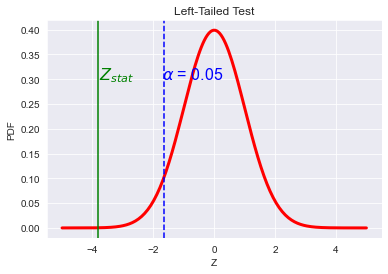

In [16]:
left_tailed_result()

Here we use the cdf!

$$p = P(Z \leq Z_{stat}) $$

In [17]:
p_value = norm.cdf(Z_stat,loc =0, scale = 1)
p_value

6.972401188893337e-05

Reject that $H_0$!

New website version probably sucks.

#### The two-tailed test

I'm skeptical of all these website variants floating around. But still let's test the notion that a given variant is different.

**Hypothesis**: New website design changes visit frequency per user per day from site A design. 
- Yes or no?

After new site rollout:
    
- Take sample of N = 200 and get sample mean $\bar{X}_1 = 2.3$

Test at Significance level of $\alpha = 0.05$:
 - Reject null if:
    - Our sample mean lies outside the 95% interval of means sampled from null population.
 - Else: 
     - Do not reject null.

In [18]:
%%capture two_tail_alpha
x_scaled = np.linspace(-5,5,200)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)

fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[0].axvline(-1.96, c = 'b')
ax[0].axvline(1.96, c = 'b')
ax[0].fill_between(x_scaled, Y_scaled, where = (x_scaled > 1.96), alpha = 0.5, color='b')
ax[0].fill_between(x_scaled, Y_scaled, where = (x_scaled < -1.96 ), alpha = 0.5, color='b')

ax[0].annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (2.5,.1), xy = (2.2,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
ax[0].set_xlabel('Z')
ax[0].set_ylabel('PDF')
ax[0].set_title('Two-Tailed Test')

ax[1].plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax[1].axvline(-1.96, c = 'b')
ax[1].axvline(1.96, c = 'b')

ax[1].fill_between(x_scaled, Y_scaled, where = (x_scaled > -1.96 )& (x_scaled < 1.96), alpha = 0.5, color='r')


ax[1].annotate('c = 0.95', xytext = (-5.0,.25), xy = (-.5,.20), fontsize=16, arrowprops=dict(facecolor='r', shrink=0.05), c ='r' )
ax[1].set_xlabel('Z')
ax[1].set_ylabel('PDF')
ax[1].set_title('Two-Tailed Test')
plt.show()

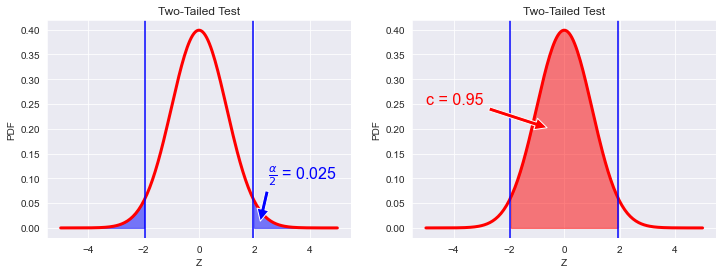

In [19]:
two_tail_alpha()

**Corresponds** to $Z_{crit} = \pm 1.96$

- Notice that we now have critical Z-values lying symmetrically about zero.


If $|Z| > 1.96$, reject the null.

In [20]:
alpha = 0.05

Z_crit_twosided = norm.isf(alpha/2)
Z_crit_twosided 

1.9599639845400545

Again:
    
- Took sample of N = 200 and get sample mean $\bar{X}_1 = 2.3$
- Test against null.

In [21]:
mu_0

2.001168

In [22]:
sigma_0

1.4151546331676974

In [23]:
Z_stat = (2.3 - mu_0)/(sigma_0/np.sqrt(200))
Z_stat

2.9863327820585717

Outside of critical region?

Calculating p-value of the two-sided test.

In [24]:
%%capture two_tail_alpha_withZ
x_scaled = np.linspace(-5,5,200)
Y_scaled = norm.pdf(x_scaled, loc = 0, scale = 1)

fig, ax = plt.subplots()

ax.plot(x_scaled, Y_scaled, c ='r', linewidth = 3)
ax.axvline(- Z_crit_twosided, c = 'b', linestyle = '--')
ax.axvline(Z_crit_twosided, c = 'b', linestyle = '--')

ax.axvline(- Z_stat, c = 'lightgreen', linestyle = '--' )
ax.axvline(+ Z_stat, c = 'g', linestyle = '--' )


ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > 1.96), alpha = 0.5, color='lightsteelblue')
ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < -1.96 ), alpha = 0.5, color='lightsteelblue')

ax.fill_between(x_scaled, Y_scaled, where = (x_scaled > Zed), alpha = 0.5, color='g')
ax.fill_between(x_scaled, Y_scaled, where = (x_scaled < -Zed ), alpha = 0.5, color='g')

ax.annotate('+$Z_{stat}$', xy = (+3,.35), fontsize=16,  c ='g')
ax.annotate('-$Z_{stat}$', xy = (-4.5,.35), fontsize=16, c ='lightgreen' )

ax.annotate(r'$\frac{\alpha}{2}$ = 0.025', xytext = (2.5,.1), xy = (2.2,.01), fontsize=16, arrowprops=dict(facecolor='b', shrink=0.05), c ='b' )
ax.set_xlabel('Z')
ax.set_ylabel('PDF')
ax.set_title('Two-Tailed Test')

plt.show()

NameError: name 'Zed' is not defined

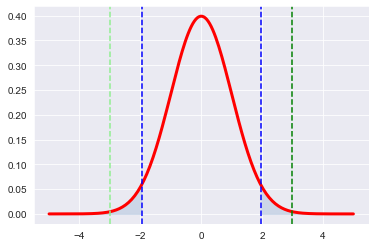

In [25]:
two_tail_alpha_withZ()

#### Green area is p-value for 2-sided Z test.

For p-value on double-sided:
- calculate that we could have a fluctuation this large or more extreme
- on either side of the distribution of sampling means

Need both cdf and sf for double-sided:

$$ P(Z <= - Z_{stat}) + P(Z >= Z_{stat}) $$

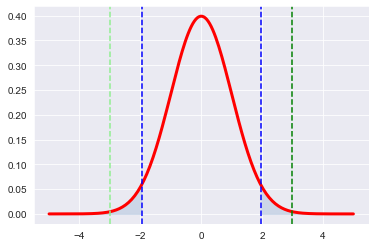

In [26]:
two_tail_alpha_withZ()

In [27]:
# evaluate p-value for the two sided test?
p_val_two_sided = norm.cdf(-Z, loc = 0, scale = 1) + norm.sf(+Z, loc = 0, scale = 1)
p_val_two_sided

0.012894665710093768

#### Summary of hypotheses, tests, $Z_{crit}$ at $\alpha = 0.05$:

Is sample drawn from population with unknown $\mu_1$ where:


| Hypothesis | Test Type | $Z_{crit}$ |

|$ \mu_{1} <  \mu_0$ ? | Left tailed | -1.645 |

|$ \mu_{1} >  \mu_0$ ? | Right tailed | +1.645 |

|$ \mu_{1} \neq  \mu_0$ ? | Two tailed | $\pm1.96$ |




Often face with a slightly different situation:
- Have a sample and sample mean.
- Want to evaluate whether different from a **known** population mean under the null.
- But dont have the standard deviation of this population distribution.


A common approach to deal with this:

- assume null is given by distribution with given population $\mu_0$
- and that sample's standard deviation approximates null population standard deviation:
$$ s \approx \sigma_0 $$


This would be true, as we know, if our sample was drawn from the null distribution.

Take our sample from site B

In [28]:
sample_with_site_B

NameError: name 'sample_with_site_B' is not defined

In [ ]:
sample_with_site_B.mean()

- Is our sample showing that population mean is now different than 2?

**Note: no information on standard deviation**

Z-test:
- tests sample mean $X_1$ of sample with size N against probability:
    - of drawing random sample means $\bar{X}$ of size N from population with mean 2.
    
- $H_0$: $\mu = 2$ <br>
- $H_a$: $\mu \neq 2$


This is a two-sided test:
- in this form, we can use a nice package

**Statsmodels**

In [ ]:
# import the ztest module from statsmodels

from statsmodels.stats.weightstats import ztest

My hypothesis for sample B is:

- I believe this sample mean is drawn from a population mean not equal to 2. Yes or no?

$H_0$ is $\mu = 2$. <br>
$H_a$ is $\mu \neq 2$.

#### Perform two sided test with statsmodels

- can input sample list directly and population mean we are comparing to:

ztest(sample, value = mean, alternative = __)

In [ ]:
Z_score, pval = ztest(sample_with_site_B, value = 2, alternative='two-sided')
print(Z_score, pval)

#### Doing a left sided test 
My hypothesis for sample B is:

- I believe this sample mean is drawn from a population mean less than 2. Yes or no?

$H_0$ is $\mu = 2$. <br>
$H_a$ is $\mu < 2$.

In [ ]:
ztest(sample_with_site_B, value = 2, alternative='smaller')